# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

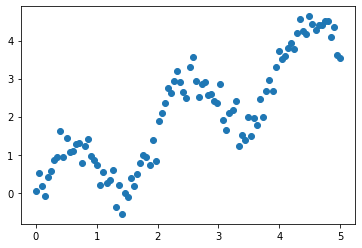

In [4]:
plt.scatter(x,y)

#### nonlinear

In [5]:
regr_lin = LinearRegression()

In [6]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [7]:
regr_lin.fit(X,y)

LinearRegression()

0.5657119925082462


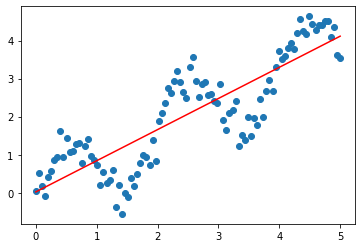

In [8]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [10]:
print(x.shape)

(100,)


In [13]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [15]:
regr_poly = LinearRegression()

In [16]:
regr_poly.fit(X_poly, y)

LinearRegression()

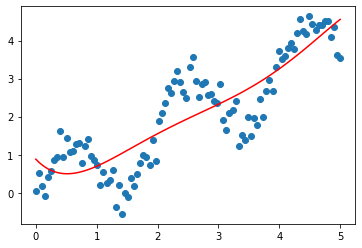

In [17]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [18]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.69236796  2.27342681 -0.92619746  0.17104891 -0.01146468]
interception:  0.88158755170637


In [19]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.88158755, 0.80179518, 0.7329003 , 0.67422649, 0.62512316,
       0.58496504, 0.55315179, 0.52910751, 0.51228029, 0.50214177,
       0.49818669, 0.49993242, 0.50691853, 0.51870631, 0.53487836,
       0.55503808, 0.57880929, 0.60583571, 0.63578054, 0.668326  ,
       0.70317292, 0.74004019, 0.77866442, 0.81879941, 0.86021572,
       0.90270025, 0.94605572, 0.9901003 , 1.03466708, 1.07960367,
       1.12477174, 1.17004654, 1.21531648, 1.26048266, 1.30545843,
       1.35016891, 1.3945506 , 1.43855085, 1.48212745, 1.52524819,
       1.56789038, 1.6100404 , 1.65169328, 1.6928522 , 1.73352807,
       1.77373908, 1.81351023, 1.85287288, 1.89186433, 1.9305273 ,
       1.96890955, 2.0070634 , 2.04504525, 2.08291519, 2.12073648,
       2.15857514, 2.19649949, 2.2345797 , 2.27288732, 2.31149485,
       2.35047527, 2.38990162, 2.4298465 , 2.47038165, 2.5115775 ,
       2.55350269, 2.59622366, 2.63980415, 2.68430479, 2.72978263,
       2.77629068, 2.82387747, 2.87258659, 2.92245625, 2.97351

In [20]:
regr_poly.predict(X_poly)

array([0.88158755, 0.80179518, 0.7329003 , 0.67422649, 0.62512316,
       0.58496504, 0.55315179, 0.52910751, 0.51228029, 0.50214177,
       0.49818669, 0.49993242, 0.50691853, 0.51870631, 0.53487836,
       0.55503808, 0.57880929, 0.60583571, 0.63578054, 0.668326  ,
       0.70317292, 0.74004019, 0.77866442, 0.81879941, 0.86021572,
       0.90270025, 0.94605572, 0.9901003 , 1.03466708, 1.07960367,
       1.12477174, 1.17004654, 1.21531648, 1.26048266, 1.30545843,
       1.35016891, 1.3945506 , 1.43855085, 1.48212745, 1.52524819,
       1.56789038, 1.6100404 , 1.65169328, 1.6928522 , 1.73352807,
       1.77373908, 1.81351023, 1.85287288, 1.89186433, 1.9305273 ,
       1.96890955, 2.0070634 , 2.04504525, 2.08291519, 2.12073648,
       2.15857514, 2.19649949, 2.2345797 , 2.27288732, 2.31149485,
       2.35047527, 2.38990162, 2.4298465 , 2.47038165, 2.5115775 ,
       2.55350269, 2.59622366, 2.63980415, 2.68430479, 2.72978263,
       2.77629068, 2.82387747, 2.87258659, 2.92245625, 2.97351

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [33]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [34]:
sigma = 0.3

In [23]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [24]:
regr_rbf = LinearRegression()

In [35]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

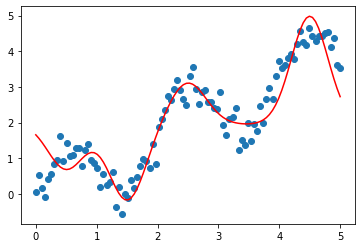

In [36]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [37]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.28598078 -2.14850077  1.1374712  -0.02917613  3.00193004]
interception:  1.978411161443632


#### Comparison

In [28]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

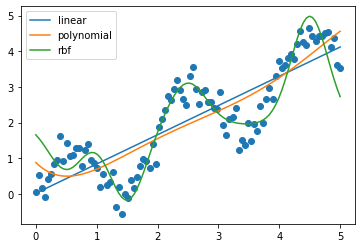

In [29]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [30]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5657119925082462


In [31]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5180501478393374


In [32]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2604719178835728
